In [54]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
df=pd.read_csv('D:\ML\Krish Naik Codes\Codebasics\datasets\lungCapData.csv',sep='\t')

In [56]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [57]:
df.shape

(725, 6)

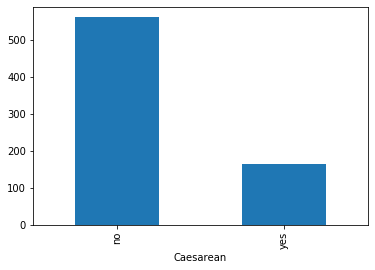

In [58]:
df['Caesarean'].value_counts().plot.bar()
plt.xlabel('Caesarean')
plt.show()

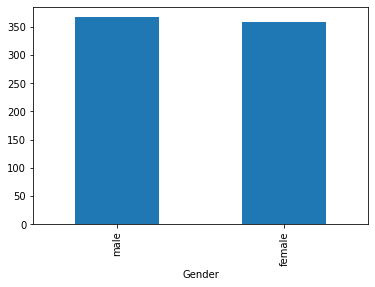

In [59]:
df['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.show()

In [60]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [61]:
smoker =pd.get_dummies(df['Smoke'],drop_first=True)

In [62]:
gender =pd.get_dummies(df['Gender'],drop_first=True)

In [63]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [64]:
df['Caesarean'] = df['Caesarean'].replace({'yes': 1, 'no':0})

In [65]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,0
1,10.125,18,74.7,yes,female,0
2,9.550,16,69.7,no,female,1
3,11.125,14,71.0,no,male,0
4,4.800,5,56.9,no,male,0


In [66]:
df =pd.concat([df,smoker,gender],axis=1)

In [67]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean,yes,male
0,6.475,6,62.1,no,male,0,0,1
1,10.125,18,74.7,yes,female,0,1,0
2,9.550,16,69.7,no,female,1,0,0
3,11.125,14,71.0,no,male,0,0,1
4,4.800,5,56.9,no,male,0,0,1


In [70]:
df.drop(['Smoke','Gender'], axis=1,inplace=True)

In [71]:
df.head()

,LungCap,Age,Height,Caesarean,yes,male
0,6.475,6,62.1,0,0,1
1,10.125,18,74.7,0,1,0
2,9.550,16,69.7,1,0,0
3,11.125,14,71.0,0,0,1
4,4.800,5,56.9,0,0,1


In [74]:
df.rename({'yes': 'yes_smoker'},inplace=True,axis=1)

In [75]:
df.head()

,LungCap,Age,Height,Caesarean,yes_smoker,male
0,6.475,6,62.1,0,0,1
1,10.125,18,74.7,0,1,0
2,9.550,16,69.7,1,0,0
3,11.125,14,71.0,0,0,1
4,4.800,5,56.9,0,0,1


In [78]:
y=df.iloc[:,0]
X=df.iloc[:,1:]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
X_train.shape , X_test.shape

((580, 5), (145, 5))

In [88]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train =minmax.fit_transform(X_train)
X_test =minmax.fit_transform(X_test)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lr.predict(X_test)

array([11.75978266,  2.71893919, 10.28881757,  7.40635052,  8.4944609 ,
       10.78723553, 10.97497248,  8.14783452,  8.18471561,  6.66557417,
        7.23374498,  7.55639691, 12.50126666, 10.45905715,  8.45118962,
        9.98717566,  3.8800492 ,  4.15858102,  9.2568851 ,  5.55010139,
       11.24381244,  6.15202479,  9.31136537,  9.24482729,  5.70505285,
        7.05073993,  2.00151591, 10.71654696, 10.11550438,  6.38227845,
        7.62535583,  8.41265023,  8.29551496,  6.65351636,  2.64752804,
        8.06673151,  3.20524444,  5.47792769,  5.55571411, 10.84743769,
        3.67788849,  9.76003496,  4.2460593 ,  2.27838944,  3.67464172,
        7.85895808,  9.55220663, 11.20124881,  7.64941656,  7.38142542,
        1.10350843,  8.38853461,  4.23565978,  8.33391317, 10.85462243,
       11.04235938,  7.13018464,  6.25795108,  4.90336669,  7.73128212,
        4.78774854, 13.30298482,  8.7007721 ,  7.6333345 ,  8.02582618,
       12.2292982 ,  7.73855313,  6.72019561,  4.39454921,  8.05

In [90]:
lr.score(X_test,y_test)

0.8417052842458452

### Actually score gives the R2 value, not the adj R2 

### 1) R squared 
### 2) Adj R squared 
### 3) MAE - Mean Absolute Error
### 4) MSE - Mean Square Error
### 5) RMSE - Mean Square Error
### 6) MAPE - Mean Absolute Percentage Error

In [92]:
y_pred =lr.predict(X_test)

mean_y_value = y_train.mean()

print('Mean Lung Capacity -->> ',mean_y_value)

Mean Lung Capacity --  7.8684172413793005


## SS res

In [94]:
SSE = np.sum(np.square(y_pred - y_test))

print('Sum of Squared Error -->> ',SSE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sum of Squared Error -->>  163.42380160316515


## SS mean

In [98]:
SSR = np.sum(np.square(y_pred - mean_y_value))

print('Sum of Squared Residual (predicted-Mean value) -->> ',SSR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sum of Squared Residual (predicted-Mean value) -->>  995.5788978044052


### R Squared 

In [100]:
R_Squared = 1 - (SSE/SSR)

print('R-Sqaured (R^2) -->> ',R_Squared)

R-Sqaured (R^2) -->>  0.8358504765784299


### MAE

In [102]:
y_pred =lr.predict(X_test)

error = y_pred - y_test

MAE = np.mean(np.abs(error))


print('mean Absolute Error (MAE) -->> ',MAE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mean Absolute Error (MAE) -->>  0.8731138280171714


### MSE

In [106]:
y_pred =lr.predict(X_test)

error = y_pred - y_test

MSE = np.mean(np.square(error))


print('Mean Sqaure Error (MSE) -->> ',MSE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Sqaure Error (MAE) -->>  1.1270607007114837


### R MSE

In [109]:
y_pred =lr.predict(X_test)

error = y_pred - y_test

RMSE = np.mean(np.sqrt(error))


print('Root Mean Sqaure Error (R MSE) -->> ',RMSE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Sqaure Error (R MSE) -->>  0.845137592306094


D:\AnacondaDistribution\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
